In [1]:
import pandas as pd
import numpy as np
from keras.models import Model, load_model
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

Using TensorFlow backend.


# Distrobution of species in training set

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
sp = train_data['species'].value_counts()

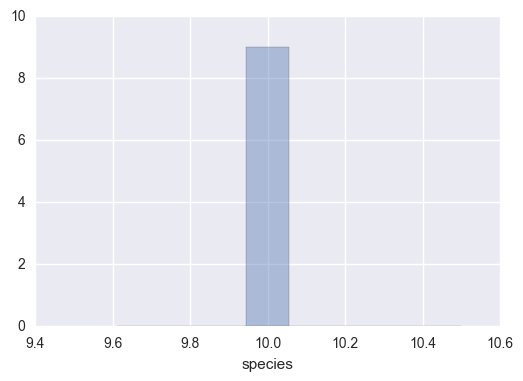

In [4]:
sns.distplot(sp)
#plt.savefig('leaf_distro.png')

All the species have 9 images in the training set

# Viewing the images as gifs

In [5]:
species = train_data['species'].unique()

In [6]:
image_ids = {}
for spec in species:
    image_ids[spec] = list(train_data['id'].loc[train_data['species']== spec])
        

In [7]:
#import imageio
#for leaf in image_ids:
#    images = []
#    kargs = {'duration':1.0}
#    for ID in image_ids[leaf]:
#        images.append(imageio.imread('images/' + str(ID) + '.jpg'))
#    imageio.mimsave('leaf_gifs/'+ leaf + '.gif' ,images,**kargs)

In [8]:
from IPython.display import Image
Image(url='leaf_gifs/Acer_Capillipes.gif')

# Model Performance

In [9]:
validation_data = pickle.load( open( "saved_models/validation_history_dict.p", "rb" ) )

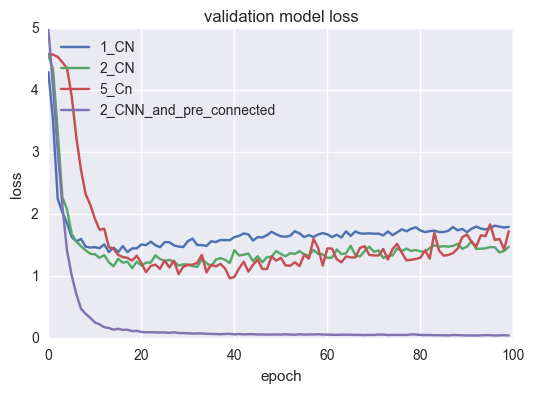

In [10]:
plt.plot(validation_data['1_CN'])
plt.plot(validation_data['2_CN'])
plt.plot(validation_data['5_CN'])
plt.plot(validation_data['2_CNN_and_pre_connected'])
plt.title('validation model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1_CN', '2_CN','5_Cn', '2_CNN_and_pre_connected'], loc='upper left')
#plt.savefig('all_models_validation_loss.png')

# View filters

In [11]:
one_CNN = load_model('saved_models/1_CNN.h5')
two_CNN = load_model('saved_models/2_CNN.h5')
two_CNN_connect = load_model('saved_models/2_CNN_and_pre_connected.h5')
five_CNN = load_model('saved_models/5_CNN.h5')

In [12]:
all_weights = []
for layer in two_CNN_connect.layers:
    w = layer.get_weights()
    all_weights.append(w)
all_weights = all_weights

In [13]:
import matplotlib.image as mpimg

In [14]:
len(all_weights)

13

In [15]:
for i,w in enumerate(all_weights):
    try:
        print w[0].shape, 'index', i
    except:
        pass

(3, 3, 1, 8) index 1
(3, 3, 8, 16) index 4
(4288, 100) index 10
(100, 99) index 12


In [16]:
from lib.data_wrappers import load_train_data
from lib.convolution_plot import make_figure,get_dim

In [17]:
train_data, val_data = load_train_data('train.csv')

In [48]:
from keras import backend as K
from keras.layers import  MaxPooling2D, Dropout, LocallyConnected2D

In [49]:
layers = [layer for layer in two_CNN_connect.layers if isinstance(layer,MaxPooling2D)]

In [50]:
imgs = np.array([44])

In [51]:
func = K.function([two_CNN_connect.layers[0].input,K.learning_phase()], 
                          [layer.output for layer in layers])

In [52]:
filts = func([val_data[1][imgs],0])

In [53]:
predictions = two_CNN_connect.predict([val_data[1][imgs],
                                       val_data[0][imgs]])

In [54]:
imshow = plt.imshow

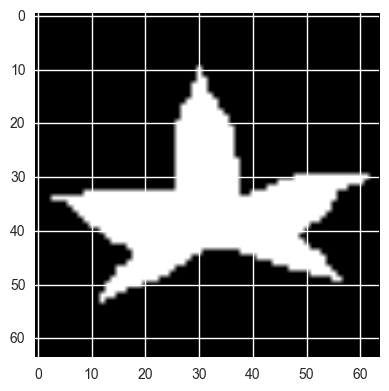

Visualizing Convolutions Layer 0


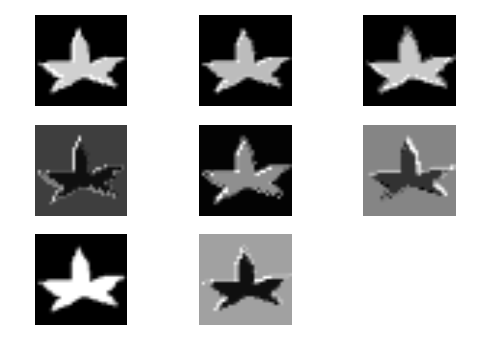

Visualizing Convolutions Layer 1


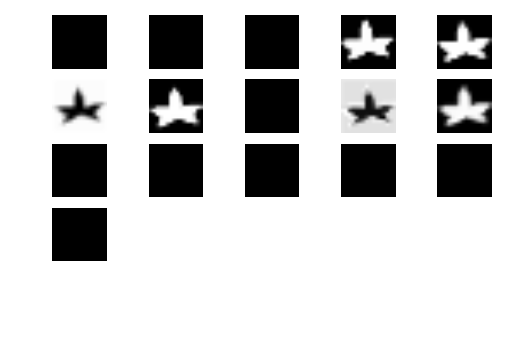

In [59]:
for img_count, img in enumerate(imgs):

    imshow(val_data[1][img][:, :, 0], cmap='gray')
    plt.tight_layout()
    plt.show()
    
    for i, filt in enumerate(filts):
        filt = filt[img_count]
        print("Visualizing Convolutions Layer %d" % i)
        fig_dict = {'flt{0}'.format(i): filt[:, :, i] for i in range(filt.shape[-1])}
        make_figure(fig_dict, *get_dim(len(fig_dict)))